### In this notebook, we will take the ugly spaghetti code and add abstraction through the use of functions. 

In [1]:
import random
from matplotlib import pyplot as plt
%matplotlib inline

The code below sets the jupyter notebook "pager" to print inline, so that its pager outputs can be viewed on GitHub without running the notebook

In [2]:
def page_printer(data, start=0, screen_lines=0, pager_cmd=None):
    if isinstance(data, dict):
        data = data['text/plain']
    print(data)

import IPython.core.page
IPython.core.page.page = page_printer

Our ECA spaghetti code

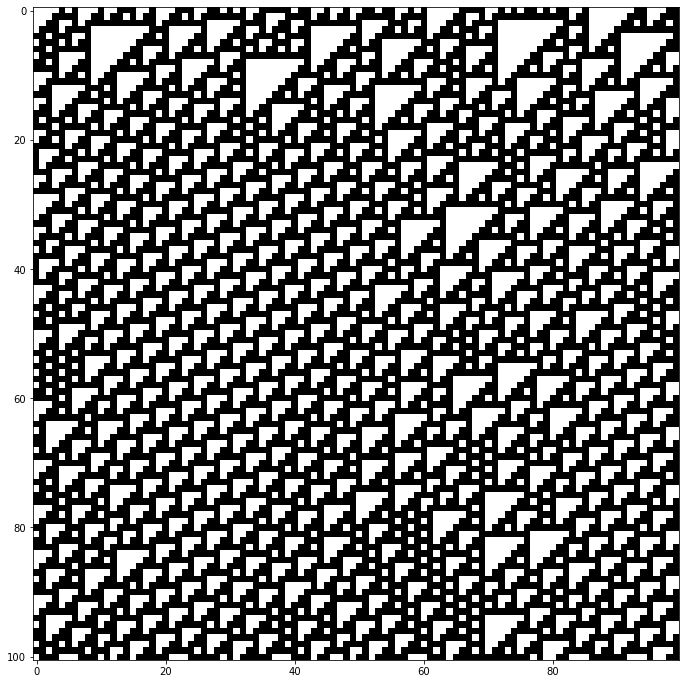

In [3]:
rule_number = 110
length = 100
time = 100 

# make the initial condition
initial_condition = []
for i in range(length):
    initial_condition.append(random.randint(0,1))

# create list of neighborhood tuples in lex. order
neighborhoods = [(0,0,0), (0,0,1), (0,1,0), (0,1,1), (1,0,0), (1,0,1), (1,1,0), (1,1,1)]

# convert the rule number to binary and padd with 0s as needed
in_binary = bin(rule_number)[2:][::-1]
binary_length = len(in_binary)
if binary_length != 8:
    padding = 8 - binary_length
    in_binary = in_binary + '0'*padding

# create the lookup table dictionary
lookup_table = {}
for i in range(8):
    key = neighborhoods[i]
    val = in_binary[i]
    lookup_table.update({key:val})
    
# initialize spacetime field and current configuration
spacetime_field = [initial_condition]
current_configuration = initial_condition.copy()

# apply the lookup table to evolve the CA for the given number of time steps
for t in range(time):
    new_configuration = []
    for i in range(len(current_configuration)):
        
        neighborhood = (current_configuration[(i-1)], 
                        current_configuration[i], 
                        current_configuration[(i+1)%length])
        
        new_configuration.append(int(lookup_table[neighborhood]))
        
    current_configuration = new_configuration
    spacetime_field.append(new_configuration)
    
# plot the spacetime field diagram
plt.figure(figsize=(12,12))
plt.imshow(spacetime_field, cmap=plt.cm.Greys, interpolation='nearest')
plt.show()

# Our exercise for remainder of class today

- Write pseudo code
    - write a set of directions or commands 
    - each command will be a function
- (Optional) write your tests (aka test driven development; TDD)
    - write tests for each function
    - this seems to be easier in industry than in science
- Fill in your functions
- Write tests (if you haven't already done so)




Let's get started: Immediately below this cell, insert a new markdown cell and start writing your pseudo code. 

Once satisfied with your pseudo code, move on to writing out the functions and tests. *Start inserting cells immediately below here*. Note that for this next step we have included below some example code in case it's helpful.

In [4]:
def random_string_basic(length):
    return [random.randint(0,1) for _ in range(length)]

In [5]:
print(random_string_basic(20))

[1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1]


This function gets the job done. However, it is not good coding practice to make such bare-bones functions. It is always a good idea to add doc strings to your function. This will make it much easier for others to know what your function is supposed to do; including what valid inputs are and what kind of outputs are expected. To take this even further, you can use 'raise' statements to raise an error if your function is given invalid inputs. For instance, if you were to pass a non-integer or negative integer value into our basic random string function, it will return an error (as shown below). For such a simple function it should be clear how these inputs break the function, but in more complicated situations it will not always be so clear. Therefore it is advised to use such assert statements to capture expected disruptions in functionality. 

In [6]:
def random_string(length):
    '''
    Returns a random bit string of the given length. 
    
    Parameters
    ----------
    length: int
        Posivite integer that specifies the desired length of the bit string.
        
    Returns
    -------
    out: list
        The random bit string given as a list, with int elements.
    '''
    if not isinstance(length, int) or length < 0:
        raise ValueError("input length must be a positive ingeter")
    return [random.randint(0,1) for _ in range(length)]

In [7]:
print(random_string(20))

[1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1]


docstrings can be accessed using the '?' operator

In [8]:
random_string?

Signature: random_string(length)
Docstring:
Returns a random bit string of the given length. 

Parameters
----------
length: int
    Posivite integer that specifies the desired length of the bit string.
    
Returns
-------
out: list
    The random bit string given as a list, with int elements.
File:      c:\users\adam.000\dropbox\code\scientific-python-tutorials\<ipython-input-6-d462fcde14a9>
Type:      function



In [9]:
print(random_string_basic(1.2))

TypeError: 'float' object cannot be interpreted as an integer

In [10]:
print(random_string(1.2))

ValueError: input length must be a positive ingeter

In the first example, a general TypeError is given that is not directly related to random string function that the user is interfacing with. This can make debugging much more difficult in more complicated situations. The same error is flagged in way that clearly relates to the inputs given by the user when raising our own ValueError, making it much easier to debug. 